<a href="https://colab.research.google.com/github/edliu2/UsedCarsProject/blob/master/DecisionTree_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Linear Regression + Feature Selection

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('drive/My Drive/processed.csv')

# print(dataset)

X = dataset.iloc[:,2:] #We are not using column 1. Also we slice it this way because we want X to be a matrix
y = dataset.iloc[:,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [0]:
#import model
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

# define new class for pipeline that passes feature importance or coef to RFE
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

DT_pipeline =  PipelineRFE([
                    ('scale', StandardScaler()), 
                    ('DT', DecisionTreeRegressor())
                     ], verbose=True)

selectionObj = RFECV(DT_pipeline, min_features_to_select=1, step=10, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10)
selectionObj.fit(X_train, y_train)
print("Optimal number of features : %d" % selectionObj.n_features_)

AttributeError: ignored

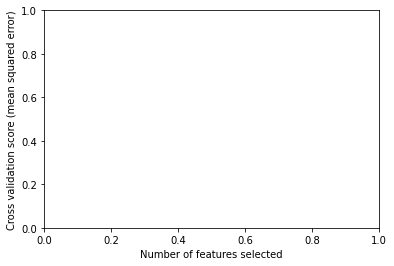

In [3]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean squared error)")
plt.plot(range(1, len(selectionObj.grid_scores_) + 1), selectionObj.grid_scores_)
plt.show()

In [4]:
#check features
selected_features = X_train.columns[selectionObj.support_]
print(selected_features)

AttributeError: ignored

In [0]:
#Making predictions on the Test Set
y_pred = selectionObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))